# Deep Learning Project
### Philipp Bauer, Ardit Fazliu, Cassandra Könitzer, Julian Kulinsky

Intro Text ...

### Import Data

In [1]:
import pandas as pd
import numpy as np
import gzip
import json
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import Image
import regex as re
import nltk
import re
#import worldcloud as wc
from nltk.corpus import stopwords
# Wenn es zu Import-Fehlern kommt, die upgrade Zeile auskommentieren und neu laden
# %pip install mlxtend --upgrade
from mlxtend.frequent_patterns import fpgrowth, association_rules


In [ ]:
df = pd.read_json("/content/drive/MyDrive/DeepLearning_WiSe22-23/Sports_and_Outdoors_5.json", lines=True, nrows=10000)

In [5]:
meta_df = pd.read_json("/Users/kulinsky/Downloads/meta_Sports_and_Outdoors.json", lines=True, nrows=20000)

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/DeepLearning_WiSe22-23/df_cleaned_final.csv", nrows=15000)

## Task 1

### 1a) Hybrid Data Exploration

# Data Import

In [ ]:
df = pd.read_json('meta_Sports_and_Outdoors.json', lines=True)

# EDA

## Überblick von Zeilen und Spalten


In [ ]:
print("Der Datensatz hat {} Zeilen und {} Spalten.".format(df.shape[0], df.shape[1]))
print("Diese Spalten sind enthalten: {}".format(df.columns))

Der Datensatz hat 962300 Zeilen und 19 Spalten.
Diese Spalten sind enthalten: Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')


| Spaltenname  | Beschreibung  | Format |
|---|---|---|
|catergory | Liste der Kategorien, zu denen das Produkt gehört  | object |
|description | Beschreibung des Produkts  | object |
|fit | größe ? | object |
|also_buy | Produkte die neben dem Main Produkt auch gekauft wurden  | object |
|tech2 | Uhrzeit und Datum der Rechnung. | object  |
|brand | Markenname | object  |
|feature | Liste mit Merkmalen  | object |
|rank | Informationen zum Verkaufsrang  | object |
|also_view | Produkte die neben dem Main Produkt auch angeschaut wurden  | object |
|main_cat | Haupt Katergorie | object |
|similar_item | Änliche Produkte  | object |
|date: | ??? | object |
|imageURL | Url des Produktbildes  | object |
|imageURLHighRes | URL des hochauflösenden Produktbildes  | object |
|details|???  | object |

## Wichtige Spalten für Task 1 und 2


### Task 1a   Hybrid Data Exploration


Für Hybrid Data Exploration benötigen Wir möglicherweise alle oder einen Teil der folgenden Daten:

`category`: Die Kategorie, in der das Produkt eingestuft wird, ist wichtig, um den Kontext des Produkts zu verstehen und es in Beziehung zu anderen Produkten in der gleichen oder ähnlichen Kategorien zu setzen.

`tech1`, `tech2`: Technologien, die im Produkt verwendet werden, können wichtig sein, um das Produkt besser zu verstehen und es mit anderen Produkten zu vergleichen, die dieselben oder ähnliche Technologien verwenden.

description: Die Beschreibung des Produkts gibt wichtige Informationen über die Funktionen und Eigenschaften des Produkts und kann hilfreich sein, um das Produkt besser zu verstehen und es mit anderen Produkten zu vergleichen.

fit: Die Angabe, für welche Zielgruppe das Produkt geeignet ist, kann hilfreich sein, um das Produkt besser einzuordnen und es mit anderen Produkten für dieselbe oder ähnliche Zielgruppen zu vergleichen.

title: Der Titel des Produkts gibt in der Regel eine kurze Zusammenfassung der wichtigsten Eigenschaften des Produkts und kann hilfreich sein, um das Produkt besser zu verstehen und es mit anderen Produkten zu vergleichen.

also_buy: Produkte, die häufig zusammen mit dem aktuellen Produkt gekauft werden, können ein Hinweis darauf sein, dass sie in ähnlicher Weise verwendet werden oder zusammen funktionieren. Diese Informationen können hilfreich sein, um das Produkt besser zu verstehen und es mit anderen Produkten zu vergleichen.

brand: Die Marke des Produkts kann ein Indikator dafür sein, wie das Produkt im Vergleich zu anderen Produkten der gleichen Marke oder zu Produkten anderer Marken abschneidet.

feature: Eigenschaften des Produkts können hilfreich sein, um das Produkt besser zu verstehen und es mit anderen Produkten zu vergleichen.

rank: Die Platzierung des Produkts in Bezug auf andere Produkte in der gleichen Kategorie kann ein Indikator dafür sein, wie beliebt oder erfolgreich das Produkt ist.



### Task 1b  Fake Review Detection

### Task 1c Association Analysis

Für die Assoziationsanalyse sollten Wir die Spalten verwenden, die Informationen über die gemeinsam gekauften Produkte enthalten,<br>
z. B. auch_buy und similar_item. Wir können diese Spalten verwenden, um Assoziationsregeln zu finden und Produkte zu identifizieren, die häufig zusammen gekauft werden.

### Task 2a: Recommender

Um ein Empfehlungssystem zu erstellen, können Wir die Spalten "category", "tech1", "tech2", "brand", "similar_item" "main_cat" "feature" "description" als Eingabemerkmale für das Modell verwenden.<br>
Diese Spalten können Informationen über die Artikel liefern, die Wir unseren Nutzern empfehlen möchten.<br>
Wir können auch die Spalten "also_buy" und "also_view" verwenden, um zusätzlichen Kontext darüber zu liefern, <br>
wie andere Nutzer mit diesen Artikeln interagiert haben. Schließlich können Sie die Spalte "Rang" verwenden, um Informationen über die Beliebtheit oder Qualität der Artikel in Unserem Datensatz bereitzustellen.



## Findings Teil 1 

### Allgemein info head tail

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962300 entries, 0 to 962299
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         962300 non-null  object
 1   tech1            962300 non-null  object
 2   description      962300 non-null  object
 3   fit              962300 non-null  object
 4   title            962300 non-null  object
 5   also_buy         962300 non-null  object
 6   tech2            962300 non-null  object
 7   brand            962300 non-null  object
 8   feature          962300 non-null  object
 9   rank             962300 non-null  object
 10  also_view        962300 non-null  object
 11  main_cat         962300 non-null  object
 12  similar_item     962300 non-null  object
 13  date             962300 non-null  object
 14  price            962300 non-null  object
 15  asin             962300 non-null  object
 16  imageURL         962300 non-null  object
 17  imageURLHi

In [ ]:
df.head()


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Adult Tutu Assorted Colors (Turquoise),[],,BubuBibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","712,899 in Clothing, Shoes & Jewelry (","[B071LQWQBQ, B00M14DG0O, B076GTTY9W, B07BSZ4GY...","<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.80,0000032042,[],[],NaN
1,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Bububibi Adult Ballet Tutu Cheetah Pink,[],,BubuBibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","712,899 in Clothing, Shoes & Jewelry (",[],"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.97,0000032069,[],[],NaN
2,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Girls Ballet Tutu Neon Orange,[B01MYHD3LV],,Unknown,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","[>#924,198 in Toys & Games (See Top 100 in Toy...","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...",Toys & Games,,,$5.70,0000031860,[],[],NaN
3,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[TUtu],,Girls Ballet Tutu Zebra Hot Pink,[],,Tutu,[Tutu],"1,314,199 in Sports & Outdoors (",[0000013714],Sports & Outdoors,,,$7.50,0000031852,[],[],NaN
4,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[Dance tutu for girls ages 2-8 years. Perfect ...,,Girls Ballet Tutu Neon Blue,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",,Bububibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","[>#393,597 in Toys & Games (See Top 100 in Toy...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...",Toys & Games,,,$6.54,0000031895,[],[],NaN


In [ ]:
df.tail()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
962295,"[Sports & Outdoors, Sports & Fitness, Golf, On...",,[],,Aweoods Inverted Umbrella Windproof Reverse Fo...,[],,eShops ltd,[],"544,488 in Sports & Outdoors (","[B06Y4Z11XM, B07C8GQR5Y, B071JL6JV8, B07C1DPWR...",Sports & Outdoors,,,$49.99,B01HJH3742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '1.2 pounds (', 'ASIN: ':..."
962296,"[Sports & Outdoors, Outdoor Recreation, Campin...",,[],,JXULE Outdoor Sports Camping Home First Aid Ki...,[],,,[],"1,436,289 in Sports & Outdoors (",[],Sports & Outdoors,,,,B01HJGNPLI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{'ASIN: ': 'B01HJGNPLI'}
962297,"[Sports & Outdoors, Outdoor Recreation, Access...",,[],,T&amp;s Shell Catcher Beretta A400 Multitarget...,"[B001U9YK8I, B005NH4NQC, B003QYGUME, B007URNR9...",,STS,[],"570,537 in Sports & Outdoors (","[B00VM87O3A, B001U9YK8I, B07GBG321Z, B07CTRPK4...",Sports & Outdoors,,,,B01HJHHBHG,[],[],"{'Shipping Weight:': '1 pounds', 'ASIN: ': 'B0..."
962298,"[Sports & Outdoors, Sports & Fitness]",,[2XU Women's Fitness Compression Tights],,2XU Women's Fitness Compression Tights,"[B01BISC5UA, B00O5XUS6O, B01B2LUO38, B0751MMZ3...",,2XU,"[62% Nylon / 38% Elastane (Invista LYCRA), Mad...","25,733 in Sports & Outdoors (","[B01BISC5UA, B00O5XUS6O, B079P8JG52, B01B2LUO3...",Sports & Outdoors,,,$35.80 - $89.95,B01HJGIZ2W,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '3 x 2 x 12...
962299,"[Sports & Outdoors, Sports & Fitness, Clothing...",,"[At the gym, on the court, in the field or pou...","class=""a-normal a-align-center a-spacing-smal...",2XU Men's Core Compression Shorts,"[B01BCM95MS, B00UA88HCA, B01N6Q4O73, B01MS6NKN...",,2XU,"[100% Other Fibers, Imported, BENEFITS: Compre...","68,476 in Sports & Outdoors (","[B01BCM95MS, B01N6Q4O73, B01MS6NKNK, B00UA88HC...",Sports & Outdoors,,,$52.10 - $69.95,B01HJGAJ9O,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '11 x 6 x 2...


Durch **df.info()** erfahren wir, dass scheinbar alle Zeilen befüllt sind doch durch ein kurzen <br> 
Blick auf die Daten durch die Funktionen **df.tail()** und **df.head** zeigt, dass  z.b  **date** leere Felder und falsche daten wie HTML Elemente enthält oder **also_buy** leere Listen enthält.

d.h die Daten enthalten Mising Values die falsch angezeigt werden und falsche Daten die abgespeichert wurden.

### Eindeutige Fehler und Missing Values

#### Missing Values

Leere Listen die als **[]** angeziegt werden aber die als **None** angezeigt werden müssten :
- category
- description
- also_buy
- feature
- rank
- also_view
- imageURL
- imageURLHighRes


#### Fehler 

Leere Zeile die als "voll" interpretiert wird:
- tech1
- fit
- tech2	
- brand
- similar_item
- date
- price	

Sonderfall Details ->Zeile die mit NaN beschrieben ist und als "voll" interpretiert wird:
- details 

HTML-Tags in der Zeile:
- tech1 
- main_cat
- date
- similar_item
- price
- category

Price muss vom $ bereinigt werden und price Ranges müssen gelöscht werden

#### Vorgehen 

Es wurde .head(50) und .tail(50) benutzt um Fehler zu entdecken Listen zu sehen und mit folgendem code überprüft:

In [ ]:
liste = df.columns.values.tolist()

# a funktion that takes a cloumn and returns the number of unique values
def unique_values(column):
    return df[column].value_counts()


## Berreinigung der Fehler

### Leere Listen in None Umwandeln:

In [ ]:
# This function returns a list of all the columns that have empty values in the dataset
def get_empty_columns(dataframe):
    columns = dataframe.columns.tolist()
    empty_columns = []
    for column in columns:
        if len(dataframe[dataframe[column] == '']) > 3:
            empty_columns.append(column)
    return empty_columns


In [ ]:

leere_liste_clolumns = ['category', 'description','also_buy','feature', 'rank', 'also_view','imageURL','imageURLHighRes']

In [ ]:

def check_cloumns(cloumns):
    # This function takes a list of cloumns and checks to see 
    # if the values are empty or not. If the value is empty, it 
    # will be changed to None
    for i in cloumns:
        df[i] = df[i].apply(lambda x: None if len(x) < 1 else x)



In [ ]:
# check_cloumns is a function that checks the columns in a list
# leere_liste_clolumns is a list of columns
# check_cloumns is called with leere_liste_clolumns as an argument

check_cloumns(leere_liste_clolumns)

### Leere Zeile in None Umwandeln:


In [ ]:
leere_Zeile_clolumns= ['tech1', 'fit', 'tech2', 'brand', 'similar_item','date','price','main_cat']

In [ ]:

check_cloumns(leere_Zeile_clolumns)

### NaN in None umwandeln

In [ ]:
df['details'] = df['details'].apply(lambda x: None if pd.isnull(x) else x)

### Price berreinigen

In [ ]:

# This code is to remove the dollar sign and everything after it in the price column
df['price'] = df['price'].apply(lambda x: None if '<' in str(x) else x)
df['price'] = df['price'].apply(lambda x: None if 'class=' in str(x) else x)
df['price'] = df['price'].apply(lambda x: None if '.a' in str(x) else x)
df['price'] = df['price'].apply(lambda x: x[1:] if str(x).startswith('$') else x)
df['price'] = df['price'].apply(lambda x: x.split(' -')[0] if '-' in str(x) else x)

### Datentypen anpassung

In [ ]:
#Takes prive and retunrs a float
df['price'] = df['price'].apply(lambda x: x.replace(',','') if type(x) == str else x)
df['price'] = df['price'].astype(float)


### Text cleaning


In [ ]:

def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = re.sub(r'amp','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', 
           text.strip().lower())).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)
    


In [ ]:
#a funktion that takes a list auf cloumns these cloumns should be made to type string after that remove html tags and clean the text
def clean_text(cloumns):
    for i in cloumns:
        
        df[i] = df[i].apply(lambda x: None if '<' in str(x) else x)
        df[i] = df[i].apply(lambda x: None if 'class=' in str(x) else x)
        df[i] = df[i].apply(lambda x: None if '.a' in str(x) else x)
        df[i] = df[i].apply(lambda x: text_cleaning(str(x)) if pd.notnull(x) else x)

In [ ]:
columns_to_clean = ['tech1', 'fit', 'tech2', 'brand', 'similar_item','date','main_cat','details','title','description','feature','category']
clean_text(columns_to_clean)

In [ ]:
df.to_csv('df_cleaned_final.csv', encoding='utf-8-sig')

### Nicht benötigite Daten löschen

Tech1, tech2, fit und similar_item können aus dem df entfernt werde da nach dem preprocessing kein Daten übrig bleiben.

In [ ]:
#drop tech1 , tech2 , similar_item , fit
df = df.drop(['tech1','tech2','similar_item','fit'], axis=1)

## EDA

### Visualisierungen

##### Top 10 Brands die enthalten sind

<AxesSubplot:>

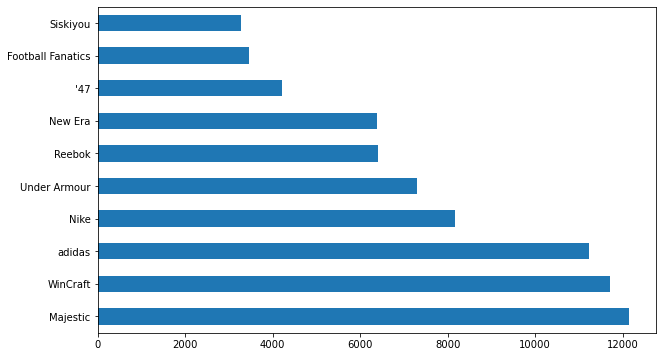

In [ ]:

df['brand'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))


##### Top 10 Produkte die in also_buy enthalten sind

<AxesSubplot:>

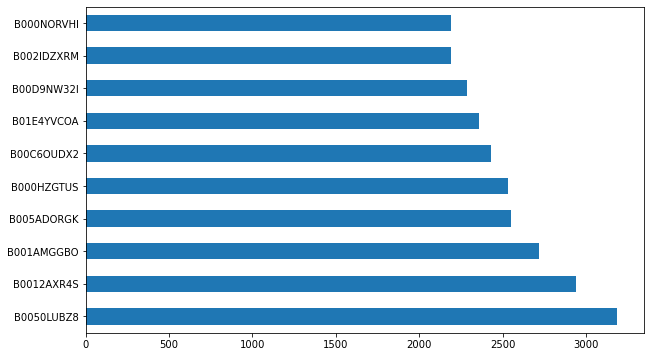

In [ ]:
#A funktion that goes through all List in column also_buy and show most bought itmes
def most_bought_items(column):
    most_bought_items = []
    for i in df[column]:
        if type(i) == list:
            for j in i:
                most_bought_items.append(j)
    return most_bought_items

#make a list of all items that are bought together
most_bought_items = most_bought_items('also_buy')

#Visualize the most top 10 bought items
most_bought_items = pd.Series(most_bought_items)
most_bought_items.value_counts().head(10).plot(kind='barh', figsize=(10, 6))


Informationen zum Produkt B0050LUBZ8

In [ ]:

df[df['asin'] == 'B0050LUBZ8']

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,date,price,asin,imageURL,imageURLHighRes,details
234383,"[Sports & Outdoors, Outdoor Recreation, Cyclin...","[, <strong>Shimano Universal Standard Brake Ca...","Shimano Universal Standard Brake Cable Set, Fo...","[B004XUQ1UQ, B00MWHDNT4, B00142FFCG, B0793Q7HS...",SHIMANO,[Universal Set: Fits either mountain bikes or ...,"3,058 in Sports & Outdoors (","[B0050O89NQ, B00L8NDVD6, B0749CY7QS, B007GJEZ5...",Sports & Outdoors,None,10.44,B0050LUBZ8,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '11.2 x 8 x...


In [ ]:
#show image of item with asin B0050LUBZ8

Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/61-IcZtXDyL._AC_SL1000_.jpg', width=300, height=300)

Informationen zum Produkt B0012AXR4S

B0012AXR4S ist kein Sportprodukt.

Nach kurzer Recherche wurde das Produkt auf Amazon gefunden und es handelt sich dabei um einen Multifunktions-Schraubenzieher

In [ ]:
df[df['asin'] == 'B0012AXR4S']
Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/41JxwfMFS+L._AC_SL1000_.jpg', width=350, height=300)

Informationen zum Produkt B001AMGGBO

B001AMGGBO ist kein Sportprodukt.


In [ ]:
df[df['asin'] == 'B0012AXR4S']
Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71bPwAYCRML._AC_SL1500_.jpg', width=350, height=300)

##### Die Top 10 Produkte die in also_view enthalten sind

<AxesSubplot:>

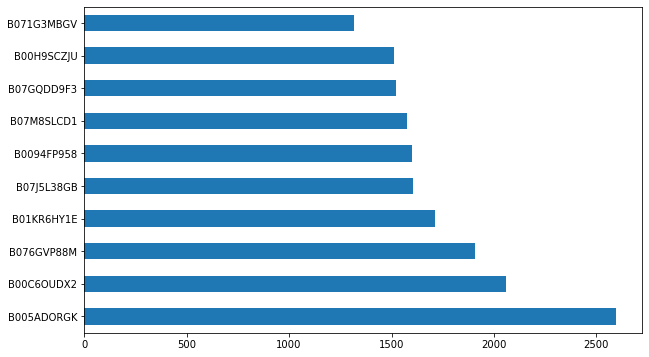

In [ ]:
#A funktion that goes through all List in column also_view and show most view itmes
def most_viewed_items(column):
    most_viewed_items = []
    for i in df[column]:
        if type(i) == list:
            for j in i:
                most_viewed_items.append(j)
    return most_viewed_items

# a list of all items that are viewed together
most_viewed_items = most_viewed_items('also_view')

#Visualize the most top 10 viewed items
most_viewed_items = pd.Series(most_viewed_items)
most_viewed_items.value_counts().head(10).plot(kind='barh', figsize=(10, 6))

Die 3 Top Produkte sind nicht im Datensatz enthalten

Nach kurzer Recherche wurden die Produkte auf Amazon gefunden.

Die Top 2 Produkte sind jeweils Angelsehnen. 

Das Top 3 Produkt ist ein Pistolenhalfter

In [ ]:
df[df['asin'] == 'B005ADORGK']


In [2]:

Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/71JiZhmwNaL._AC_SX522_.jpg',width=300, height=300)

In [ ]:
df[df['asin'] == 'B00C6OUDX2']


In [3]:

Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71foywBSx1L._AC_SL1500_.jpg',width=300, height=300)

In [ ]:
df[df['asin'] == 'B076GVP88M']


In [4]:

Image(url= 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/61zuMc2WeIL._AC_SL1500_.jpg',width=300, height=300)

In [5]:
Image(url= 'https://preview.redd.it/bhtyvnw5blo61.jpg?width=640&crop=smart&auto=webp&s=23b9c1b868d4bdde66b43a765cdfe48cb92d8441',width=300, height=300)

##### Top 10 Hauptkategorien

<AxesSubplot:>

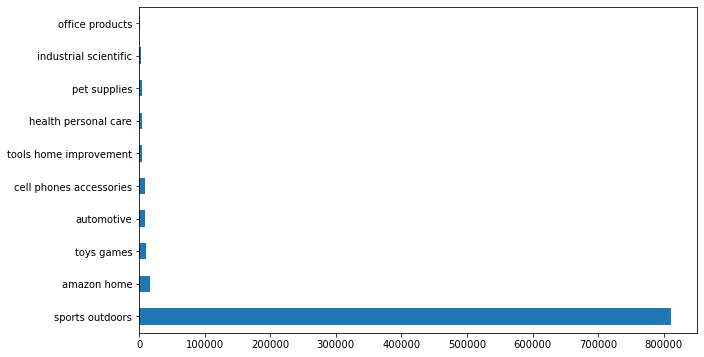

In [ ]:

df['main_cat'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))

##### Preisverteilung unter den Produkten

<AxesSubplot:>

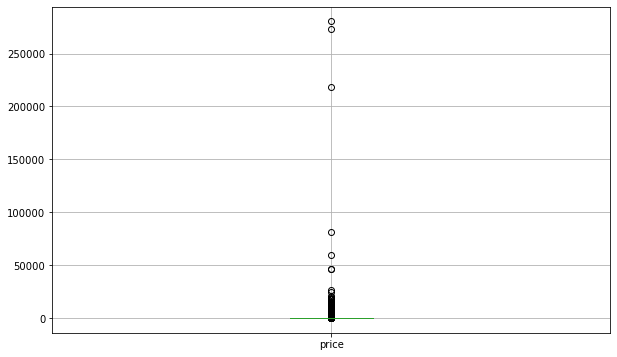

In [ ]:

df.boxplot(column=['price'], figsize=(10, 6))

In [ ]:

df['price'].describe()


count    400437.000000
mean         48.708791
std         761.219974
min           0.010000
25%          10.500000
50%          19.990000
75%          40.050000
max      280361.950000
Name: price, dtype: float64

<AxesSubplot:>

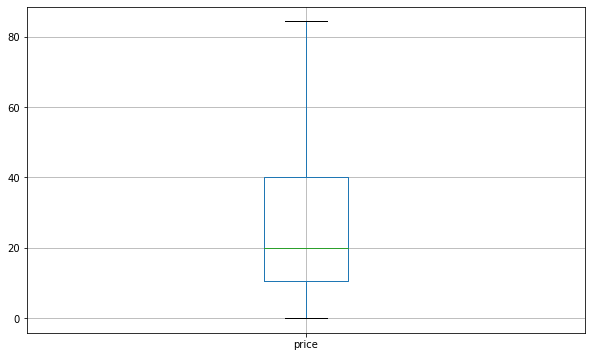

In [ ]:
#boxplot withour ouliers
df.boxplot(column=['price'], figsize=(10, 6), showfliers=False)

### 1b) Fake Review Detection

# Fake Review Detection

Task1b: Fake Review Detection: Apply text mining and machine learning algorithms to detect potential fake reviews
Aim of this project is the detection of fake reviews

### 1. Definition von Features, welche uns helfen können Fake Reviews zu erkennen

| Feature                  | Definition                                                                                                                                        |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| Länge der Rezension      | Anzahl der Wörter in der Bewertung kann ein Hinweis darauf sein, ob sie echt oder gefälscht ist                                                   |
| Bewertungen pro Benutzer | Bewertungen können, von Bots erstellt werden - z.B. Nutzer neu registiert und nur eine Bewertung abgegeben hat, kann das ein wichtiges Indiz sein |
| Tendenz der Bewertung    | Gefälschte Bewertungen oft polarisierend -> sehr positiv oder sehr negativ                                                                        |
| Nützlichkeit             | Eventuelles Label Nützlichkeit zu definieren und damit eine Korrelation zwischen gefälschten Bewertungen und niedrigen Nützlichkeiten erarbeiten  |
| Verified User nutzen     | Verifizierte Bewertungsmetrik kann unterstützen, nur Vorsicht wenn Bots als verfiziert gehandhabt werden                                          |
| Bewertungsstil           | Wenn Bewertung in anderen Stil als andere Bewertungen verfasst ist, kann dadurch erkannt werden, dass es sich um ein fake Review handelt          |
| Kohärenz                 | Produkt wird anders bewertet als beschrieben                                                                                                      |
| Lesbarkeit               | Lesbarkeit als Label nutzen um gefälschte Bewertungen zu erkennen                                                                                 |
| Review text nutzen       | Eventuell Bag of Words Vektorisierung nutzen und Naive Bayes verwenden um Text zu klassifizieren                                                  |

### 2. Möglichkeiten von Fake Reviews

#### Wir erwarten die folgenden Arten von gefälschten Bewertungen im Datensatz

- Computergenerierte Bewertungen
- Menschlich generiert und zum Review-Farmen gekauft
- Menschlich erstellte negative Bewertungen
- Menschlich erstellte positive Bewertungen
- Eine Person mehrere Reviews auf einen Artikel

### 3. Folgerung

Als Folge aus den zuvor definierten Punkten achten wir in unserem Datensatz auf die folgenden Anzeichen:

**Review Merkmale**
Länge der Rezension
Durchschnittliche Wortlänge des Rezensenten
Anzahl von Sätzen
Durchschnittliche Satzlänge des Rezensenten
Prozentsatz der großgeschriebenen Wörter
Prozentsatz der positiven/negativen meinungsbildenden Wörter in jeder Rezension.

**Rezensenten Merkmale**
Maximale Anzahl von Bewertungen an einem Tag
Prozentsatz der Rezensionen mit positiver/negativer Bewertung
Durchschnittliche Länge der Rezensionen
Standardabweichung der Bewertungen der Rezensionen des Rezensenten

sources ('https://www2.cs.uh.edu/~arjun/tr/UH_TR_2014_07.pdf', 'https://ieeexplore.ieee.org/document/9760908', 'https://www.frontiersin.org/articles/10.3389/frai.2022.922589/full', 'https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model')


sources ('https://www2.cs.uh.edu/~arjun/tr/UH_TR_2014_07.pdf', 'https://ieeexplore.ieee.org/document/9760908', 'https://www.frontiersin.org/articles/10.3389/frai.2022.922589/full', 'https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model')### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from datetime import datetime
from time import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, pairwise_distances
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from nltk.corpus import stopwords
ENGLISH_STOP_WORDS = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm

In [62]:
# tokenizer methods
def spl_tokenizer(sentence):
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()
    listofwords = sentence.split(' ')
    listoflemmatized_words = []
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            token = WordNetLemmatizer().lemmatize(word)
            try:
                if tfidf.type == 'review':
                    token = 'r_' + token
                elif tfidf.type == 'summary':
                    token = 's_' + token
            except:
                pass
            listoflemmatized_words.append(token)
    return listoflemmatized_words


def tfidf(dataframe_column, tokenizer, min_df=0.02, max_df=0.8, ngram_range=(1,1)):
    column_name = dataframe_column.name
    if column_name == 'reviewText':
        tfidf.type = 'review'
    elif column_name == 'summary':
        tfidf.type = 'summary'
    else:
        tfidf.type = 'none'
    vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df, tokenizer = tokenizer, ngram_range = ngram_range)
    vectorizer.fit(dataframe_column)
    reviews_tokenized = vectorizer.transform(dataframe_column)
    tokens = pd.DataFrame(columns=vectorizer.get_feature_names(), data=reviews_tokenized.toarray())

    return tokens

### Data Loading

In [3]:
fake_review_base = pd.read_json('/Users/philippbauer/Downloads/Sports_and_Outdoors_5.json', lines=True, nrows=10000)


### Data Analysis

Overviewing the data allows us to gain a better understanding of the data we are working with, including its characteriscs, and patterns.

We want to get a rough sketch of the data set, its size, and gain first impressions.
Therefore, we have a look at the first and the last five rows and of a random data sample of 10 rows of the complete data set.

In [4]:
# Data Overview
fake_review_base.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
0,5,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,What a spectacular tutu! Very slimming.,Five Stars,1433289600,NaN,NaN,NaN
1,1,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,What the heck? Is this a tutu for nuns? I know...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN
2,5,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,Exactly what we were looking for!,Five Stars,1421107200,NaN,NaN,NaN
3,5,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,I used this skirt for a Halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN
4,4,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,This is thick enough that you can't see throug...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN


Looking at the data set, we learn that it filled with information of review text and data given for products bought on an online plattform.

In [5]:
# Show the last 5 rows
fake_review_base.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
9995,5,True,"08 3, 2016",A2FQCC73R51X2H,B0000AT105,JeffersonOh,Have had no problems with this brand.,Five Stars,1470182400,"{'Size:': ' 330 Yd, Pound Test 10', 'Color:': ...",NaN,NaN
9996,5,True,"07 31, 2016",A2IEERDC728C5L,B0000AT105,Duck Killer,Great stuff!,Great stuff!,1469923200,"{'Size:': ' 100 Yd, Pound Test 17', 'Color:': ...",NaN,NaN
9997,5,True,"07 25, 2016",A3KYLM40M50TJY,B0000AT105,Nightrunner,I've used many different lines over the years....,Great for spinning reels.,1469404800,"{'Size:': ' 1000 Yd, Pound Test 10', 'Color:':...",NaN,NaN
9998,5,True,"07 16, 2016",A168JDDDBOW8E1,B0000AT105,ken petty,very strong & great price,Five Stars,1468627200,"{'Size:': ' 330 Yd, Pound Test 6', 'Color:': '...",NaN,NaN
9999,5,True,"07 12, 2016",AD4DW28YS52YI,B0000AT105,bykboi,"Just what I needed for an invisible, UV resist...",Excellent hobby & craft filament line . . . fo...,1468281600,"{'Size:': ' 330 Yd, Pound Test 4', 'Color:': '...",NaN,NaN


In [6]:
# Sample overview to get 10 random examples
fake_review_base.sample(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
3152,5,False,"10 18, 2010",AU7Q9UXFQJV2D,B00005AXIX,urbana,I picked this up used from a pawn shop for 40 ...,Good for shooting sports not for golf.,1287360000,NaN,NaN,NaN
11,5,False,"08 1, 2016",A1LACH6MLQWZ,0899332757,Doug Erlandson,If you're interested in exploring any area of ...,Great for exploring the rural parts of the state,1470009600,{'Format:': ' Paperback'},NaN,NaN
950,5,True,"11 22, 2014",A3FZZC9XS1GRD3,7245456313,Josh Fiebig,Excellent set of bands. All of the connection...,Look no further for your exercise bands!,1416614400,NaN,NaN,NaN
6602,4,False,"10 14, 2011",A1NVZNIM4F2LIW,B00006I56J,J. Young,I prefer this stove to the propane tank versio...,"No real complaints, good camp stove",1318550400,NaN,6,NaN
2847,2,True,"12 4, 2016",A2AL7AXAUO0UDL,B000051ZHS,Suanne B.,I'm only giving a 2 star only because I used i...,Pool Toy,1480809600,{'Color:': ' Orange'},NaN,NaN
2504,2,True,"11 15, 2013",ASIT13CWSOUHS,B00004WA54,blade,"To much blade play up and down, side to side.m...",Not a good start..,1384473600,NaN,NaN,NaN
7874,5,True,"04 3, 2015",AMVYTYZALWWJP,B00008BFYG,Amazon Customer,hard to keep kids off it. rides great and is d...,rides great and is,1428019200,"{'Color:': ' Pink', 'Style:': ' Standard Packa...",NaN,NaN
115,1,True,"08 15, 2012",A3RE9O8QXQD99X,7245456321,Ms S.,This product is horrible. I am 5'8 and weigh ...,Wobbly unstable and impractical,1344988800,NaN,NaN,NaN
8139,5,False,"02 17, 2017",AVPAYODAO8Y9N,B00008WVK3,Vasil Kimadze,I LOVE this water bottle! I have been searchin...,I LOVE this water bottle,1487289600,"{'Size:': ' 0.6-Litre', 'Color:': ' Alu'}",NaN,NaN
9639,4,True,"06 4, 2016",A2XMSNQCP0184L,B0000ANEY8,C. Silvey,"Not bad for what they are, but it's kind of an...",Alright,1464998400,"{'Size:': ' X-Small', 'Color:': ' Gold'}",2,NaN


#### Identifying Variables
The "info()"-function provides us with information of the data frame such as index type, dtype, columns, non-values, and memory usage. It gives us a short overview of the dataset.
It's a handy approach when doing exploratory analysis of the data.

In [7]:
# Feature names, null count and dtype
fake_review_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         10000 non-null  int64 
 1   verified        10000 non-null  bool  
 2   reviewTime      10000 non-null  object
 3   reviewerID      10000 non-null  object
 4   asin            10000 non-null  object
 5   reviewerName    10000 non-null  object
 6   reviewText      9998 non-null   object
 7   summary         9997 non-null   object
 8   unixReviewTime  10000 non-null  int64 
 9   style           6304 non-null   object
 10  vote            1218 non-null   object
 11  image           110 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 869.3+ KB


We learn that we have 12 different features consisting of in64 and objects - there seem to be missing values as well which we will have to handle later on

In [8]:
fake_review_base.describe()

,overall,unixReviewTime
count,10000.000000,1.000000e+04
mean,4.444700,1.426630e+09
std,1.003116,6.557798e+07
min,1.000000,9.689760e+08
25%,4.000000,1.399334e+09
50%,5.000000,1.437048e+09
75%,5.000000,1.471392e+09
max,5.000000,1.525824e+09


Only the mean of the overall score seems to be of importance for us, giving us the mean stars given for the products

Text(0, 0.5, 'count')

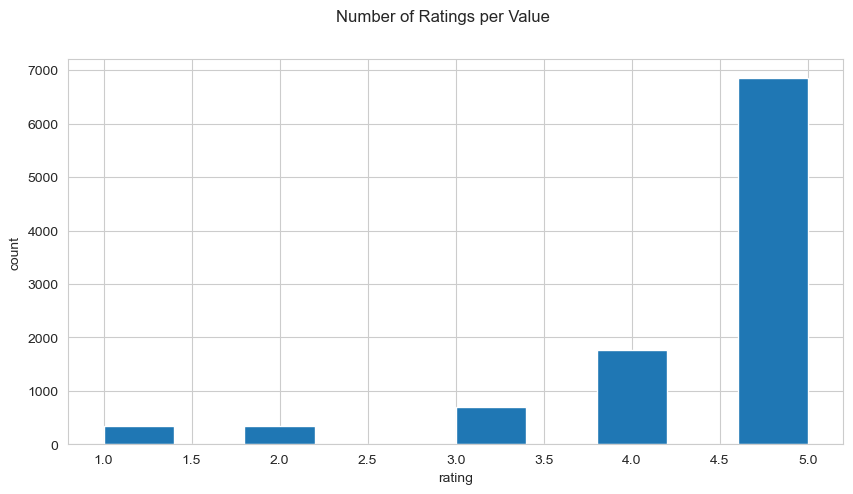

In [61]:
#Get count of values in a categorical variable, with how much stars a product has been rated
values = fake_review_base.overall.value_counts()
values
plt.suptitle("Number of Ratings per Value")
fake_review_base.overall.hist(figsize=(10,5))
plt.xlabel('rating')
plt.ylabel('count')

#### Missing Values
Since we found some missing values earlier, we will take a look at the numbers and a matrix to visualize it

In [10]:
# Nan Count per Column
fake_review_base.isna().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
reviewerName         0
reviewText           2
summary              3
unixReviewTime       0
style             3696
vote              8782
image             9890
dtype: int64

<AxesSubplot:>

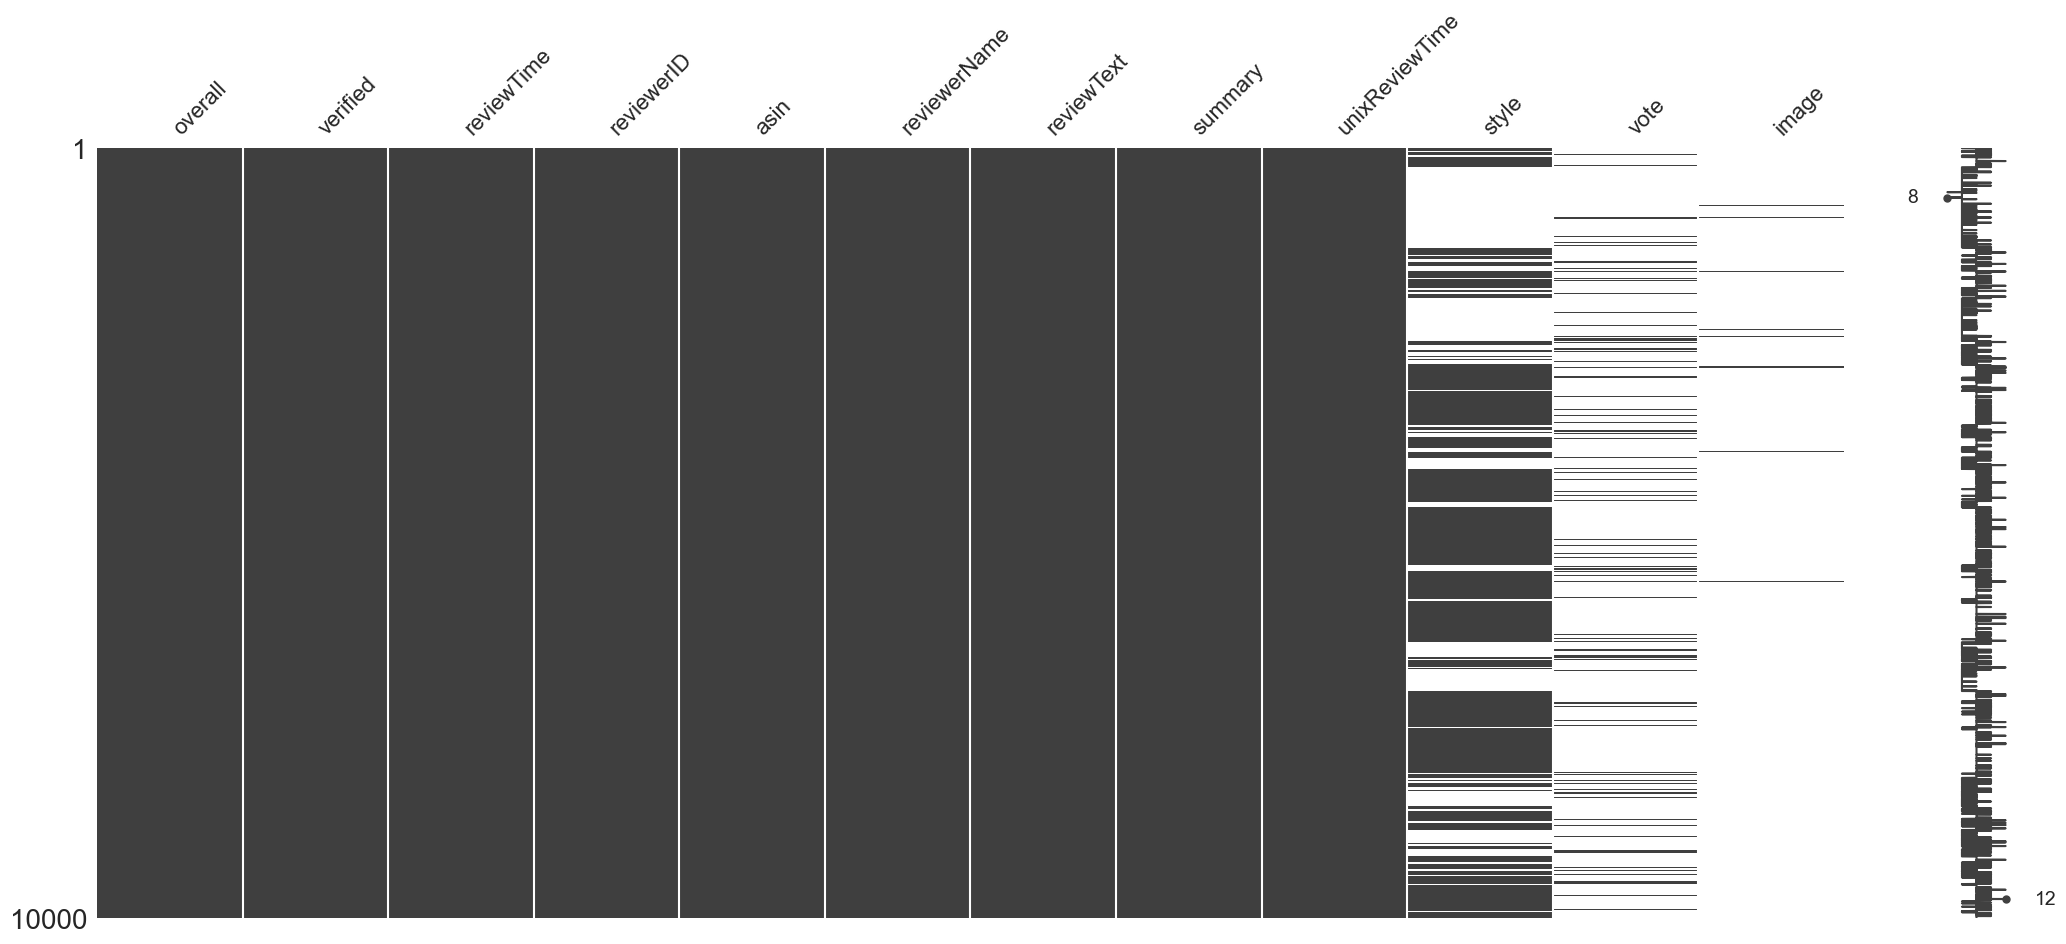

In [11]:
# Visualisation
msno.matrix(fake_review_base)

We realize that there are many values missing - more info of the dataset can be generated after we handle them and clean up the data overall

### Data Cleaning

In [40]:
# Cleaning Date field from unix to timestamp
fake_review_clean = fake_review_base.copy()

fake_review_clean['unixReviewTime'] = pd.to_datetime(fake_review_clean['unixReviewTime'],unit='s')

fake_review_time = fake_review_clean.copy()

# review time not needed anymore because of duplication with timestamp
# but save month and day of week for comparison purposes
fake_review_clean['month'] = pd.DatetimeIndex(fake_review_clean['reviewTime']).month
fake_review_clean['dayofweek'] = pd.DatetimeIndex(fake_review_clean['reviewTime']).dayofweek

fake_review_clean = fake_review_clean.drop('reviewTime', axis=1)

# dd-mm-yyyy format
fake_review_clean['unixReviewTime'] = fake_review_clean['unixReviewTime'].dt.strftime('%d-%m-%Y')


In [17]:
# Remove empty cells
fake_review_clean = fake_review_clean.drop(len(np.where(pd.isnull(fake_review_clean))))

In [18]:
# drop cells not needed for fake review detection
fake_review_clean = fake_review_clean.drop(['style', 'image'], axis=1)

In [19]:
# Drop rows without review
fake_review_clean = fake_review_clean[fake_review_clean['reviewText'].notna()]

In [20]:
#fill empty summaries with review text
fake_review_clean['summary'].fillna(fake_review_clean['reviewText'], inplace = True)

In [21]:
#fill empty vote with 0
fake_review_clean['vote'].fillna(0, inplace = True)

In [22]:
# No emtpy names -> fill them with 'No_Name_Given' and if not mark special feature column as 0
fake_review_clean['reviewerName'].fillna('No_Name_Given', inplace = True)
fake_review_clean['nameGiven'] = np.where(fake_review_clean['reviewerName'] != 'No_Name_Given',1,0)

In [23]:
#Convert True and False to binary
map_dict = {False:0, True:1}
fake_review_clean['verified'] = fake_review_clean['verified'].map(map_dict)

In [24]:
# Reset index since we dropped values
fake_review_clean = fake_review_clean.reset_index().drop('index', axis=1)

In [25]:
# Text Review Preprocessing
stop = stopwords.words('english')
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop))

In [26]:
fake_review_clean

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,month,dayofweek,nameGiven
0,5,1,A180LQZBUWVOLF,0000032034,Michelle A,What spectacular tutu! Very slimming.,Five Stars,03-06-2015,0,6,2,1
1,1,1,ATMFGKU5SVEYY,0000032034,Crystal R,What heck? Is tutu nuns? I know cut STILL. Als...,Is this a tutu for nuns?!,01-04-2015,0,4,2,1
2,5,1,A22CP6Z73MZTYU,0000032034,L. Huynh,I used skirt Halloween costume glued bunch fea...,I liked that the elastic waist didn't dig in (...,23-12-2014,0,12,1,1
3,4,1,A22L28G8NRNLLN,0000032034,McKenna,"This thick enough can't see it, long, sure che...",This is thick enough that you can't see throug...,15-12-2014,0,12,0,1
4,5,1,A5N0QU8JBRVQQ,0899332757,Amazon Customer,"Already Atlas, topo CD set Northeast, Garmin G...",I love maps,05-07-2008,0,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5,1,A2FQCC73R51X2H,B0000AT105,JeffersonOh,Have problems brand.,Five Stars,03-08-2016,0,8,2,1
9993,5,1,A2IEERDC728C5L,B0000AT105,Duck Killer,Great stuff!,Great stuff!,31-07-2016,0,7,6,1
9994,5,1,A3KYLM40M50TJY,B0000AT105,Nightrunner,I've used many different lines years. Stren mo...,Great for spinning reels.,25-07-2016,0,7,0,1
9995,5,1,A168JDDDBOW8E1,B0000AT105,ken petty,strong & great price,Five Stars,16-07-2016,0,7,5,1


In [27]:
# remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

In [28]:
# lower
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: x.lower())

#### same for summary

In [29]:
# Drop rows without review
fake_review_clean = fake_review_clean[fake_review_clean['summary'].notna()]
# Text Review Preprocessing
stop = stopwords.words('english')
fake_review_clean['summary'] = fake_review_clean['summary'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop))
# remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
fake_review_clean['summary'] = fake_review_clean['summary'].apply(
    lambda x: ' '.join(word for word in tokenizer.tokenize(x)))
# lower
fake_review_clean['summary'] = fake_review_clean['summary'].apply(lambda x: x.lower())

In [30]:
# Check data for status
fake_review_clean.isna().sum()

overall           0
verified          0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
month             0
dayofweek         0
nameGiven         0
dtype: int64

Data seems to have no more missing values and is tokenized

In [31]:
# Look for duplicates and show them
print(fake_review_clean.duplicated().sum())
fake_review_clean[fake_review_clean.duplicated()].head(fake_review_clean.duplicated().sum())

2


,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,month,dayofweek,nameGiven
1673,5,1,A3JDWJTM1UBJCF,B00004R9MM,J. Lamar Jackson,as expected,five stars,23-01-2016,0,1,5,1
2982,4,1,AUBJFI9PRXYIG,B0000534W2,Captain,good,four stars,04-09-2017,0,9,0,1


It is extremely noticeable that many of the duplicate reviews have a similar structure and often also fall on the same products, but knowing, that there is also another duplicate we try to get rid of them for now, but save them in a dataframe for a possible flagging use later on

In [32]:
# save duplicates in another dataframe
duplicates = fake_review_clean[fake_review_clean.duplicated()].head(fake_review_clean.duplicated().sum())
#drop duplicates
fake_review_clean.drop_duplicates(inplace=True)
# check duplicates
print(fake_review_clean.duplicated().sum())

0


In [33]:
# reviewer behaviour pattern by looking at reviews per reviewer
fake_review_clean["reviewerID"].value_counts()

A3OXHLG6DIBRW8    5
A1ZZ390BQFBL8F    3
APS831ZLF95PS     3
A2SIWI60IUI6UE    3
AJGU56YG8G1DQ     3
                 ..
A38EAG92WV5MPG    1
AW8H7RF0TBRSL     1
AQM93LJ6XZ3MM     1
A2ALZBC0IS5XTR    1
AD4DW28YS52YI     1
Name: reviewerID, Length: 9602, dtype: int64

### Continued EDA
After cleaning most of the data we can visualize more of the insights the data gives us, for example the number of verified purchases over the last couple of years or the distributions of the numeric features

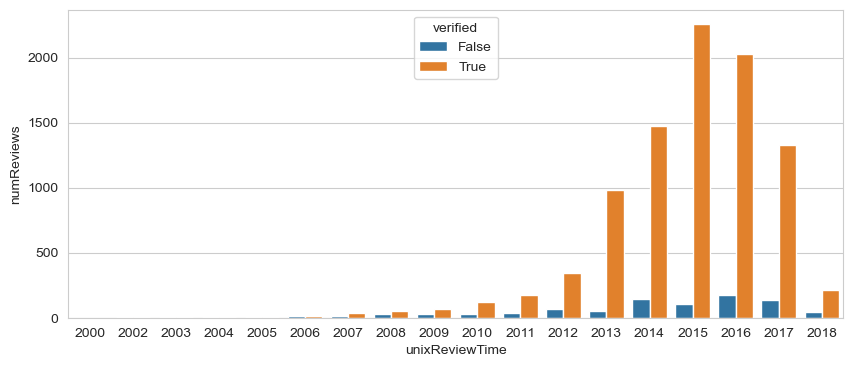

In [57]:
#plotting number of reviews per year (segmented by verified purchases)
verified_year = fake_review_time['verified'].groupby(fake_review_time['unixReviewTime'].dt.year).value_counts()
verified_year = verified_year.reset_index(level='unixReviewTime').rename(columns={'verified':'numReviews'}).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='unixReviewTime', y='numReviews', hue='verified', data=verified_year)
plt.show()

Since the number of unverified reviews seems to below but can still be significant, we are also looking for fake reviews, we look at the number of unverfied accounts

([<matplotlib.axis.XTick at 0x7fda23e39d90>,
 [Text(0, 0, ''), Text(0, 0, '')])

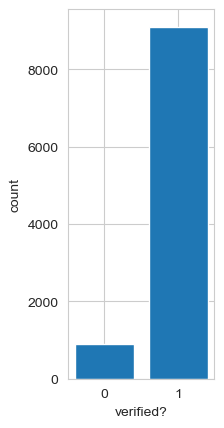

In [60]:
plt.subplot(1,3,1)
plt.bar(df['overall'].value_counts().index, df['overall'].value_counts().values)
plt.xlabel('rating')
plt.ylabel('count')

It looks like q big margin of users are verfied, this means that while we definetly will look at the number of fake reviews made by unverified accounts, we still have to check for verified users. To increase our chances of finding those accounts, we will need to add more features to our dataset

## Feature Engineering

In [ ]:
# Let's check for reviews per reviewer per date
reviews_per_date1 = fake_review_clean[['reviewerID', 'unixReviewTime']].copy()
reviews_per_date2 = reviews_per_date1.groupby(by=['unixReviewTime', 'reviewerID']).size().reset_index(name='review_per_date')
reviews_per_date2['review_per_date'] = reviews_per_date2['review_per_date'] / reviews_per_date2['review_per_date'].max()
fake_review_clean = fake_review_clean.merge(reviews_per_date2, on=['reviewerID', 'unixReviewTime'], how='inner')

In [ ]:
# numer of reviews per asin
map_numreviews = fake_review_clean['asin'].value_counts().to_dict()
fake_review_clean['asin_review_number'] = fake_review_clean['asin'].map(map_numreviews)

In [ ]:
fake_review_clean.groupby('review_per_date').size().sort_values(ascending=False)

In [ ]:
# create feature if reviewer has posted multiple reviews
review_dict = fake_review_clean['reviewerID'].value_counts().to_dict()
# map dict
fake_review_clean['multipleReviews_reviewer'] = fake_review_clean['reviewerID'].map(review_dict)
# convert binary
fake_review_clean['multipleReviews_reviewer'] = np.where(fake_review_clean['multipleReviews_reviewer'] > 1, 1, 0)

In [ ]:
# check for lengths of reviews
fake_review_clean['length'] = fake_review_clean['reviewText'].apply(lambda x: len(x.split()))

In [ ]:
# get review deviation between mean and review
fake_review_clean['rating_deviation'] = abs(fake_review_clean['overall'] - fake_review_clean["overall"].mean()) / 4

In [ ]:
# creature feature to see reviewers with only 5 star or one star reviews and second one with high rating deviation
five_star_reviewers = fake_review_clean['overall'].groupby(fake_review_clean['reviewerID']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
one_star_reviewers = fake_review_clean['overall'].groupby(fake_review_clean['reviewerID']).agg(lambda x: (np.unique(x)==1).all()).to_dict()
# add columns
fake_review_clean['five_star_reviewer'] = fake_review_clean['reviewerID'].map(five_star_reviewers)
fake_review_clean['one_star_reviewer'] = fake_review_clean['reviewerID'].map(one_star_reviewers)
# binary again
fake_review_clean['five_star_reviewer'] = fake_review_clean['five_star_reviewer'].astype(int)
fake_review_clean['one_star_reviewer'] = fake_review_clean['one_star_reviewer'].astype(int)

In [ ]:
# forgot summary length
# check for lengths of summaries
fake_review_clean['length_summary'] = fake_review_clean['summary'].apply(lambda x: len(x.split()))

In [ ]:
fake_review_eng = fake_review_clean

## Tokenization, lemmatisation and stemming

In [ ]:
review_tokens = tfidf(fake_review_eng['reviewText'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=1000)
summary_tokens = tfidf(fake_review_eng['summary'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=800)

## Scaling

In [ ]:
# only scale numerics
fake_review_eng_numerics = fake_review_eng.select_dtypes(include=['int32','int64'])

In [ ]:
# Scaling
minmaxscaler = MinMaxScaler()
fake_review_eng_scaled = minmaxscaler.fit_transform(fake_review_eng_numerics)
fake_review_scaled = pd.DataFrame(fake_review_eng_scaled, columns = fake_review_eng_numerics.columns)

del fake_review_eng_numerics, fake_review_eng_scaled

In [ ]:
fake_review_scaled

## PCA
To reduce the dimensionality of our data we will use a PCA to reduce the set.

In [ ]:
# we will only used to tokenized data of the reviewText and the scaled dataset
review_tokens = tfidf(fake_review_eng['reviewText'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=1000)
df_pca = pd.concat([fake_review_scaled, review_tokens], axis = 1)

In [ ]:
# since my computer crashed quite often I delete most of the dataframes used earlier
del review_tokens, fake_review_scaled

In [ ]:
# Create a PCA instance: pca
pca = PCA(n_components=27)
pcs = pca.fit_transform(df_pca)

In [ ]:
#explained variance per ratio
print('PCA Variance Ratio for 200 PCs: ', pca.explained_variance_ratio_.cumsum()[200])
print('PCA Variance Ratio for 300 PCs: ', pca.explained_variance_ratio_.cumsum()[300])
print('PCA Variance Ratio for 400 PCs: ', pca.explained_variance_ratio_.cumsum()[400])

In [ ]:
PCA_components = pd.DataFrame(pcs)

## K-Means Clustering

In [ ]:
k_values = range(8,32)
inertia_scores = []

for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k, verbose=1)
    #fitting on first 350 PCs
    kmeans_model.fit(PCA_components.iloc[:,0:26])
    #get scores and append them
    inertia = kmeans_model.inertia_
    #append score
    inertia_scores.append(inertia)

In [ ]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

increases can be seen at 15, 19, 22 and 30, so we will use those clusters as examples

In [ ]:
#instantiate KMeans with 25 clusters
kmeans_model25 = KMeans(n_clusters=25, verbose=1)
#fitting KMeans on first 400 PCs
kmeans_model25.fit(PCA_components.iloc[:,0:350])

In [ ]:
data_pc_matrix = PCA_components.iloc[:,0:350].to_numpy()
pc_feature_matrix = pca.components_[0:350,:]
df_analysis = pd.DataFrame(np.matmul(data_pc_matrix,pc_feature_matrix), columns=df_pca.columns)
# we add the defined clusters towards the dataframe for compairability with our labeled learning technique
df_analysis['cluster'] = kmeans_model25.labels_

In [ ]:
df_analysis.head()

In [ ]:
#getting names of non-token features and cluster for analysis
non_tokens_clust = list(df_analysis.columns[0:12]) + ['cluster']
#getting names of token features and cluster for analysis
tokens_clust = list(df_analysis.columns[12:])
#getting the mean token value per cluster
df_tokens = df_analysis.loc[:,tokens_clust].groupby('cluster').mean()

In [ ]:
df_analysis

In [ ]:
df_analysis.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

In [ ]:
#getting the mean token value per cluster
df_tokens = df_analysis.loc[:,tokens_clust].groupby('cluster').mean()

In [ ]:
df_review = df_tokens.iloc[:,0:1153]

In [ ]:
tokens = ['r_great', 'r_excellent', 'r_love']
df_tokens = df_analysis[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

In [ ]:
cluster=22
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])

# Calssification with external data

In this Step, we aim to build a machine learning model that can automatically label data based on a set of pre-labeled data. To do this, we will be using  supervised learning, where we train a model on a labeled dataset and then use it to make predictions on new, unlabeled data.

To begin, we will be using a pre-labeled dataset from Kaggle, which contains a variety of different data points with corresponding labels. We will use this dataset to train our model, and once it is trained, we will test it on a set of unlabeled data to see how accurately it can predict the correct labels.

Class = 0 not fake

Class = 1 fake

## Load pre Labeled Data

In [6]:
#This code reads the json file that is available in the same directory as the code
#The json file is loaded in a pandas dataframe

df_classification =pd.read_json('Sports_and_Outdoors.json',lines=True)

# This code samples 50000 rows from the original dataset and assigns it to a new variable
df_classification1 = df_classification.sample(n= 50000, random_state=42)



ValueError: Expected object or value

## Data preprocessing

In [ ]:
#remove redundant columns
#Drop the columns '_id' and 'unixReviewTime' from the dataframe
df_classification1 = df_classification1.drop(['_id',], axis=1)

# This code checks for the number of missing values in the dataset
df_classification1.isnull().sum()

# Drop the rows with missing values
dfd = df_classification1.dropna()

# review time column cleanup
dfd['reviewTime'] = dfd['reviewTime'].str.replace(',', '').str.replace(' ', '.')

C:\Users\Ardit\AppData\Local\Temp\ipykernel_22080\4021810214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['reviewTime'] = dfd['reviewTime'].str.replace(',', '').str.replace(' ', '.')


## Feature engenieering

In [ ]:
# Let's check for reviews per reviewer per date
reviews_per_date1 = dfd[['reviewerID', 'unixReviewTime']].copy()
reviews_per_date2 = reviews_per_date1.groupby(by=['unixReviewTime', 'reviewerID']).size().reset_index(name='review_per_date')
reviews_per_date2['review_per_date'] = reviews_per_date2['review_per_date'] / reviews_per_date2['review_per_date'].max()
dfd = dfd.merge(reviews_per_date2, on=['reviewerID', 'unixReviewTime'], how='inner')

In [ ]:
# numer of reviews per asin
map_numreviews = dfd['asin'].value_counts().to_dict()
dfd['asin_review_number'] = dfd['asin'].map(map_numreviews)

In [ ]:
dfd.groupby('review_per_date').size().sort_values(ascending=False)

review_per_date
0.333333    49259
0.666667      510
1.000000        6
dtype: int64

In [ ]:
# create feature if reviewer has posted multiple reviews
review_dict = dfd['reviewerID'].value_counts().to_dict()
# map dict
dfd['multipleReviews_reviewer'] = dfd['reviewerID'].map(review_dict)
# convert binary
dfd['multipleReviews_reviewer'] = np.where(dfd['multipleReviews_reviewer'] > 1, 1, 0)

In [ ]:
# check for lengths of reviews
dfd['length'] = dfd['reviewText'].apply(lambda x: len(x.split()))

In [ ]:
# get review deviation between mean and review
dfd['rating_deviation'] = abs(dfd['overall'] - dfd["overall"].mean()) / 4

In [ ]:
# creature feature to see reviewers with only 5 star or one star reviews and second one with high rating deviation
five_star_reviewers = dfd['overall'].groupby(dfd['reviewerID']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
one_star_reviewers = dfd['overall'].groupby(dfd['reviewerID']).agg(lambda x: (np.unique(x)==1).all()).to_dict()
# add columns
dfd['five_star_reviewer'] = dfd['reviewerID'].map(five_star_reviewers)
dfd['one_star_reviewer'] = dfd['reviewerID'].map(one_star_reviewers)
# binary again
dfd['five_star_reviewer'] = dfd['five_star_reviewer'].astype(int)
dfd['one_star_reviewer'] = dfd['one_star_reviewer'].astype(int)

In [ ]:
# forgot summary length
# check for lengths of summaries
dfd['length_summary'] = dfd['summary'].apply(lambda x: len(x.split()))

In [ ]:
review_tokens = tfidf(dfd['reviewText'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=1000)
summary_tokens = tfidf(dfd['summary'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=800)

In [ ]:
# only scale numerics
dfd = dfd.select_dtypes(include=['int32','int64'])

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49775 entries, 0 to 49774
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   overall                   49775 non-null  int64
 1   unixReviewTime            49775 non-null  int64
 2   class                     49775 non-null  int64
 3   asin_review_number        49775 non-null  int64
 4   multipleReviews_reviewer  49775 non-null  int32
 5   length                    49775 non-null  int64
 6   five_star_reviewer        49775 non-null  int32
 7   one_star_reviewer         49775 non-null  int32
 8   length_summary            49775 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 3.2 MB


In [ ]:
# Scaling
standartscaler = StandardScaler()
#scale all cloumns of dfd except the target column class
dfd_scaled = standartscaler.fit_transform(dfd.drop('class', axis=1))
dfd_scaled = pd.DataFrame(dfd_scaled, columns = dfd.drop('class', axis=1).columns)
#add the target column class to the scaled dataframe
dfd_scaled['class'] = dfd['class']







In [ ]:
dfd_scaled

,overall,unixReviewTime,asin_review_number,multipleReviews_reviewer,length,five_star_reviewer,one_star_reviewer,length_summary,class
0,-2.790031,-0.641346,-0.383815,-0.221057,-0.214460,-1.246860,3.848588,-0.320352,0
1,0.626025,0.545936,-0.226644,4.523715,0.291459,-1.246860,-0.259836,-0.703427,1
2,0.626025,-0.500723,5.588659,-0.221057,0.021636,0.802015,-0.259836,-0.320352,1
3,0.626025,0.515676,-0.069474,-0.221057,-0.495525,0.802015,-0.259836,-0.320352,1
4,-0.227989,0.241550,-0.383815,-0.221057,-0.461797,-1.246860,-0.259836,-0.320352,1
...,...,...,...,...,...,...,...,...,...
49770,0.626025,-0.009434,-0.383815,-0.221057,-0.225702,0.802015,-0.259836,-0.703427,1
49771,0.626025,-1.972811,0.244867,-0.221057,1.033472,0.802015,-0.259836,-0.320352,1
49772,-0.227989,0.175689,9.046407,-0.221057,-0.338129,-1.246860,-0.259836,-0.320352,1
49773,0.626025,-0.566585,1.345059,-0.221057,0.988501,0.802015,-0.259836,0.445799,1


In [ ]:
X = dfd_scaled.drop(['class'], axis=1)
y = dfd_scaled['class']

In [ ]:
#fake_review_scaled= fake_review_scaled.drop(['class'], axis=1)
#split date into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

## Model building

In [ ]:
logreg = LogisticRegression(max_iter = 400)

model_liste = [logreg]

In [ ]:
for model in model_liste:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  cm = confusion_matrix(y_test, predictions)
  TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
  print(model.__class__.__name__)
  print('True Positive(TP)  = ', TP, np.round(TP / (TP+FP+TN+FN) * 100, 2))
  print('False Positive(FP) = ', FP, np.round(FP / (TP+FP+TN+FN) * 100, 2))
  print('True Negative(TN)  = ', TN, np.round(TN / (TP+FP+TN+FN) * 100, 2))
  print('False Negative(FN) = ', FN, np.round(FN / (TP+FP+TN+FN) * 100, 2))
  accuracy =  (TP+TN) /(TP+FP+TN+FN)
  print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))





LogisticRegression
True Positive(TP)  =  8204 82.41
False Positive(FP) =  0 0.0
True Negative(TN)  =  1751 17.59
False Negative(FN) =  0 0.0
Accuracy of the binary classification = 1.000


## Date preprocessin 2

In [ ]:
#remove redundant columns
#Drop the columns '_id'  from the dataframe
df_classification1 = df_classification1.drop(['_id',], axis=1)


In [ ]:

# review time column cleanup
df_classification1['reviewTime'] = df_classification1['reviewTime'].str.replace(',', '').str.replace(' ', '.')

In [ ]:
df_classification1['reviewText'] = df_classification1['reviewText'].str.lower().str.replace('[^\w\s]', '')

C:\Users\Ardit\AppData\Local\Temp\ipykernel_22080\3647470423.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_classification1['reviewText'] = df_classification1['reviewText'].str.lower().str.replace('[^\w\s]', '')


## Feature enbenieering 2

In [ ]:
vectorization = TfidfVectorizer(analyzer = 'word', min_df=0.0, max_features=2000)
reviews = df_classification1['reviewText'].to_list()
X = vectorization.fit_transform(reviews)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df_classification1['class'], test_size = 0.2, random_state = 42)

## Model building 2

In [ ]:
logreg = LogisticRegression(max_iter = 400)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(logreg.__class__.__name__)
print('True Positive(TP)  = ', TP, np.round(TP / (TP+FP+TN+FN) * 100, 2))
print('False Positive(FP) = ', FP, np.round(FP / (TP+FP+TN+FN) * 100, 2))
print('True Negative(TN)  = ', TN, np.round(TN / (TP+FP+TN+FN) * 100, 2))
print('False Negative(FN) = ', FN, np.round(FN / (TP+FP+TN+FN) * 100, 2))
accuracy =  (TP+TN) /(TP+FP+TN+FN)
print(accuracy)

LogisticRegression
True Positive(TP)  =  7866 78.66
False Positive(FP) =  966 9.66
True Negative(TN)  =  934 9.34
False Negative(FN) =  234 2.34
0.88


## Import Data to Label 

In [ ]:
df_reviews= pd.read_json('Sports_and_Outdoors_5.json', lines=True, nrows=50000)

In [ ]:
df_reviews['reviewText'] = df_reviews['reviewText'].str.lower().str.replace('[^\w\s]', '')

C:\Users\Ardit\AppData\Local\Temp\ipykernel_22080\2477462407.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['reviewText'] = df_reviews['reviewText'].str.lower().str.replace('[^\w\s]', '')


In [ ]:
#drop na reviwtext
df_reviews = df_reviews.dropna(subset=['reviewText'])

In [ ]:
#vectorize every review Text in df_reviews
vectorization = TfidfVectorizer(analyzer = 'word', min_df=0.0, max_features=2000)


In [ ]:

reviews = df_reviews['reviewText'].to_list()
X = vectorization.fit_transform(reviews)

In [ ]:
#predict the class of the review with logreg
predictions = logreg.predict(X)


In [ ]:
#append the predictions to the df_reviews
df_reviews['predictions'] = predictions

In [ ]:
df_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image,vectorized_reviews,predictions
0,5,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,what a spectacular tutu very slimming,Five Stars,1433289600,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,1,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,what the heck is this a tutu for nuns i know y...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,5,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,exactly what we were looking for,Five Stars,1421107200,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,5,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,i used this skirt for a halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,4,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,this is thick enough that you cant see through...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


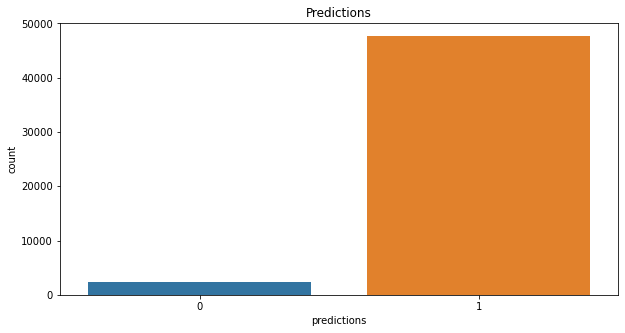

In [ ]:
# Plot the predicitons
plt.figure(figsize=(10,5))
sns.countplot(x='predictions', data=df_reviews)
plt.title('Predictions')
plt.show()


## Finding 

Der Erste Ansatz hat nicht richtig funktioniert, da das preprocessing dazu gehfürt hat das die Daten zu genau waren auch bei einer test size von 0.99 sind wir auf eine ACC von 1 gestoßen den Fehler dahinter konnten wir leider nicht finden.

Deshalb haben wir eine Zweite Vrogehensweise gewhält bei der nur der review text bearbeitet wird und am ende vectorized wird. Dabei kommt dann eine ACC von 0.88 herraus. Dieses Model haben wir bnutzt um unsere Originaldaten zu labeln.

### 1c) Assiociation Analysis

#### Grundintention: 
Finden von frequent itemsets, d.h. von Produkten, die oft miteinander gekauft werden. Dazu sollen Assoziationsregeln aufgestellt werden.
#### Grundansatz: 
Wir betrachten für die Assoziations-Analyse aus dem Meta-Datensatz die folgenden Features: `asin`, `also_buy`, `also_view` und `category`. 
Diese Features sind für uns die Kernelemente einer einzigartigen User-Session. Dabei bilden `asin` und `also_buy` den Warenkorb des Kunden. In `also_view` werden die Produkte gelistet, die sich ein Kunde angeschaut, aber nicht gekauft hat. 


> User-Session = Warenkorb + Angeschaute Objekte

> Warenkorb = Gekauftes Hauptprodukt (`asin`) + Nebeneinkäufe (`also_buy`)

> Angeschaute Objekte = `also_view`

**Annahme:** Die Wahrscheinlichkeit, dass zwei User eine exakt selbe User-Session durchgeführt haben, halten wir für vernachlässigbar. 

**Generelle Bedingung:** Damit ein Eintrag aus dem Datensatz für die Assoziations-Analyse in Frage kommt, darf `also_buy` nicht leer sein, da dann nur ein Produkt gekauft wurde und somit kein relevantes Itemset darstellt.

#### Herausforderungen und Lösungsansätze  

1.   Duplikate: Jede `asin` hat einen zugehörigen Warenkorb, der durch sich selbst und `also_buy` repräsentiert wird. Jede ASIN in `also_buy` hat einen eigenen Eintrag, der jedoch den selben Warenkorb repräsentiert. Hier müssen wir Lösungen finden, auf die im weiteren Verlauf eingegangen wird.
2.   Leere Einträge in `also_buy`: Transaktionen, die nur ein Produkt enthalten und dessen `also_buy`-Liste leer ist, werden nicht betrachtet und aus dem Datensatz aussortiert.

In [6]:
# Für unser weiteres Vorgehen sind nur die Spalten 'also_buy', 'asin', 'also_view' und 'category' relevant
associ = meta_df[['also_buy', 'asin', 'also_view', 'category']]

# Nur Zeilen berücksichtigen, in denen 'also_buy' nicht leer ist
associ_df = associ[associ['also_buy'].map(lambda d: len(d) > 0)]

# Nur Zeilen berücksichtigen, in denen 'category' nicht leer ist
associ_df = associ_df[associ_df['category'].map(lambda d: len(d) > 0)]

associ_df

,also_buy,asin,also_view,category
2,[B01MYHD3LV],0000031860,"[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",0000031895,"[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQW]",0000032034,"[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
8,[B07C12VSM5],0000031887,"[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",0692747222,[],"[Sports & Outdoors, Sports & Fitness, Exercise..."
...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...",B000CC1QLS,"[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...",B000CC59FC,"[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[Sports & Outdoors, Outdoor Recreation, Climbi..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...",B000CC6668,"[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...",B000CCBPAA,"[1591792819, 0974470643, 1450400248]","[Sports & Outdoors, Sports & Fitness, Exercise..."


#### Finding #1
Zuerst wurden initial 20.000 Zeilen des Meta-Datensatzes importiert. Nach der Filterung der für die Assoziationsanalyse relevanten Spalten, in denen die Ausprägungen keine leere Liste darstellen, bleiben 6.556 Zeilen übrig. Das sind knapp 32.8% des ursprünglichen Datensatzes. <br>
Dies ist darauf zurückzuführen, dass sich einige Transaktionen aus **lediglich einem gekauften Produkt** zusammensetzen. Verdeutlicht wird es, wenn man zuerst nur auf `also_buy` filtert (Länge der Liste je Zeile > 0). Hier wird der Datensatz von 20.000 Zeilen auf 6.900 reduziert (-65.5%). <br>
Die Bereinigung von Daten, in denen `category` nicht leer ist, reduziert den Datensatz dann final auf 6.556 Zeilen - also circa um weitere 5.0%. Wir nehmen an, dass diese 5.0% ASINs darstellen, die nicht der Überkategorie 'Sports & Outdoors' angehören oder dass eine Anomalie vorliegt.


In [7]:
# Erstellen einer ProductsBought Column und initial mit 0 befüllen, um asin + also_buy zu verbinden
# Wir nehmen an, dass also_buy + title = Warenkorb ist
associ_df['ProductsBought'] = 0

In der obenstehenden Code-Zelle wurde eine neue Spalte erstellt und initial mit 0 befüllt: `ProductsBought`. 
Diese Spalte soll das Resultat der Konkatenation der Spalten `also_buy` und `asin` darstellen, basierend auf unserer grundlegenden Annahme, dass ein Warenkorb aus `asin` und `also_buy` besteht.

In [8]:
# Iterieren über jede Zeile und erweitern der Liste um die Werte in also_buy und asin
# Für jede Zeile wird eine Liste erstellt
for index in range(len(associ_df)):
  indexlist = list()
  if len(associ_df.iloc[index][0]) == 0:
    pass
  else:
    for entry in associ_df.iloc[index][0]:
      indexlist.append(entry)
  indexlist.append(associ_df.iloc[index][1])
  associ_df['ProductsBought'].iloc[index] = indexlist
associ_df

/var/folders/sh/n29_vtln1v3blbc8_w4t3q0r0000gn/T/ipykernel_40720/2112366411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associ_df['ProductsBought'].iloc[index] = indexlist


,also_buy,asin,also_view,category,ProductsBought
2,[B01MYHD3LV],0000031860,"[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B01MYHD3LV, 0000031860]"
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",0000031895,"[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQW]",0000032034,"[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ..."
8,[B07C12VSM5],0000031887,"[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B07C12VSM5, 0000031887]"
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",0692747222,[],"[Sports & Outdoors, Sports & Fitness, Exercise...","[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X..."
...,...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...",B000CC1QLS,"[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...",B000CC59FC,"[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[Sports & Outdoors, Outdoor Recreation, Climbi...","[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...",B000CC6668,"[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...",B000CCBPAA,"[1591792819, 0974470643, 1450400248]","[Sports & Outdoors, Sports & Fitness, Exercise...","[1938477073, 1591792819, 1450400248, 080521031..."


Nachdem der Warenkorb erstellt worden ist, werden im nächsten Schritt die Spalten `ProductsBought`(Warenkorb) und `also_view` extrahiert, um die Grundlage für die Identifikation der User-Sessions zu schaffen.

In [9]:
# Erstellen eines neuen DataFrames.
# Wir nehmen an, dass ProductsBought und also_view eine einzigartige User-Session darstellen.
result_df = pd.DataFrame(data=associ_df[['ProductsBought', 'also_view']])
result_df

,ProductsBought,also_view
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[]
...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]"


Damit wir im Folgenden Duplikate ausschließen können, werden die Spalten `ProductsBought` und `also_view` sortiert gemäß dem Ansatz, dass für jeden Warenkorb > 1 Item jede ASIN eine eigenen Transaktions-Eintrag bekommt. 
Dies dient dazu die einzelnen Spalten genau miteinander vergleichen zu können ohne auf die Reihenfolge der ASINs zu beachten, die keine Differenzierung einer Session darstellt. 
Verdeutlichung: Gegeben sei eine Transaktion mit den Items X, Y, Z. Eine weitere Transaktion hat die Reihenfolge Y, X, Z. Für uns stellt dies die selbe User-Session dar, basierend auf den obenstehenden Annahmen.

In [10]:
# Sortieren von ProductsBought in alphabetischer Reihenfolge
productsbought_col = result_df['ProductsBought']
productsbought_col = productsbought_col.map(sorted)

# Sortieren von also_view in alphabetischer Reihenfolge
alsoview_col = result_df['also_view']
alsoview_col = alsoview_col.map(sorted)

# Sortierte Spalten result_df anhängen. So können wir sicherstellen, dass Duplikate die selbe Reihenfolge von ASINs haben
result_df['ProductsBoughtSorted'] = productsbought_col
result_df['AlsoViewSorted'] = alsoview_col
result_df

,ProductsBought,also_view,ProductsBoughtSorted,AlsoViewSorted
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[0000031860, B01MYHD3LV]","[0000031887, B005C4Y4F6, B007XAI53E, B00KF54D6..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK...","[B001CK3OIW, B00942YEVQ, B009THX5MA, B009THXHP..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ...","[B00CL1NYP4, B00D0FCQQI, B00JHNSNSM, B00KKNXKF..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[0000031887, B07C12VSM5]","[0000031860, B008F0SMUC, B00D0ZXGOY, B074R6R1B..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3...",[]
...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ...","[B000BAXHOA, B0011UBZ6G, B0014B1E8Q, B002HHZ4Y..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[0762755334, 0762782072, 0762790040, 097401121...","[B0001VO9EQ, B0026LUVTG, B002J8VXRU, B003VOSDD..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG...","[B002HODNOC, B002KSDI2C, B003M9A5FQ, B0063O1V7..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]","[0385721544, 0609810340, 0805210318, 086547752...","[0974470643, 1450400248, 1591792819]"


Für die Duplikatentferung werden nun die sortierten Listen `ProductsBoughtSorted` sowie `AlsoViewSorted` zusammengeführt. Dies stellt für uns die absolut einzigartige User-Session dar (`UserSession`). 
Im Anschluss wird eine boolsche Maske (`mask`) erstellt, um Duplikate zu identifizieren. Im Anschluss wird diese Maske auf unseren Datensatz angewandt.

In [11]:
# Zusammenführen beider sortierten Listen
col1 = result_df['ProductsBoughtSorted']
col2 = result_df['AlsoViewSorted']
col3 = [x + y for x, y in zip(col1, col2)]
result_df['UserSession'] = col3

# Suche nach Duplikaten
# Erstellen einer boolschen Maske zur Identifizierung von Duplikaten in UserSession
mask = result_df['UserSession'].duplicated()

# Anwenden der Maske auf unseren Datensatz
result_df = result_df[~mask]

result_df


,ProductsBought,also_view,ProductsBoughtSorted,AlsoViewSorted,UserSession
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[0000031860, B01MYHD3LV]","[0000031887, B005C4Y4F6, B007XAI53E, B00KF54D6...","[0000031860, B01MYHD3LV, 0000031887, B005C4Y4F..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK...","[B001CK3OIW, B00942YEVQ, B009THX5MA, B009THXHP...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ...","[B00CL1NYP4, B00D0FCQQI, B00JHNSNSM, B00KKNXKF...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[0000031887, B07C12VSM5]","[0000031860, B008F0SMUC, B00D0ZXGOY, B074R6R1B...","[0000031887, B07C12VSM5, 0000031860, B008F0SMU..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3..."
...,...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ...","[B000BAXHOA, B0011UBZ6G, B0014B1E8Q, B002HHZ4Y...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[0762755334, 0762782072, 0762790040, 097401121...","[B0001VO9EQ, B0026LUVTG, B002J8VXRU, B003VOSDD...","[0762755334, 0762782072, 0762790040, 097401121..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG...","[B002HODNOC, B002KSDI2C, B003M9A5FQ, B0063O1V7...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]","[0385721544, 0609810340, 0805210318, 086547752...","[0974470643, 1450400248, 1591792819]","[0385721544, 0609810340, 0805210318, 086547752..."


#### Finding #2:
Die Duplikatentfernung bereinigt unseren Datensatz von 6.556 Einträgen auf 4.758 (-27.4%). <br>
Insgesamt konnten wir durch diese Filterschritte den initialen Datensatz von 20.000 Zeilen auf 4.758 reduzieren. Am Ende bleiben also 23.8% des Originaldatensatzes übrig.

In [12]:
# Für die Bestimmung von frequent itemsets und association rules nutzen wir nur ProductsBought, ergo den gesamten Warenkorb einer Session
final_df = pd.DataFrame(data=result_df['ProductsBought'])
final_df

,ProductsBought
2,"[B01MYHD3LV, 0000031860]"
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ..."
8,"[B07C12VSM5, 0000031887]"
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X..."
...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F..."
19989,"[1938477073, 1591792819, 1450400248, 080521031..."


In [ ]:
# Laden des gesamten Datensatzes für das Matching
compare = pd.read_json("/Users/kulinsky/Downloads/meta_Sports_and_Outdoors.json", lines=True)

##### Transformieren der Daten
Im Folgenden werden nun die einzelnen Warenkörbe aus `final_df` in eine Liste von ASINs überführt und einer übergeordneten Liste angefügt. Diese zweidimensionale Liste `data_to_be_encoded` ist die Bedingung für die Transformation der Daten in ein für die Assoziationsanalyse geeignetes Format. Es wird dazu verwendet, um den `TransactionEncoder` auf unseren Warenkorb anzuwenden. Dieser dient dazu, jedes Produkt in eine eigene Spalte umzuwandeln. Jede Transaktion stellt dann eine Zeile dar. Die Werte je Zeile werden dann mit `True`/`False` befüllt, um zu definieren, ob jene ASIN (Spalte) im Warenkorb enthalten war.

##### Wichtiger Vorschritt
Im nächsten Schritt werden wir nun alle ASINs der zweidimensionalen `data_to_be_encoded` entfernen, die nicht der Überkategorie 'Sports & Outdoors' angehören. Das ist aus dem Grund notwendig, da wir im Laufe des Projekts feststellen mussten, dass frequent Itemsets mit ASINs gebildet werden, die keine Kategorie hatten. Sie stammten wahrscheinlich aus einer anderen Kategorie. Da wir dies nicht von vornherein ausschließen können durch unsere erste Filterung auf `category`, da unsere Leistungsfähigkeit leider nur 20.000 Daten umfasst, müssen wir hier diesen Schritt ausführen, um sicherzustellen, dass ausschließlich ASINs der Kategorie 'Sports & Outdoors' im Datensatz enthalten sind. <br>
Die dafür durchzführenden Schritte sind die Folgenden:
1. Umwandlung der Spalte `ProductsBought` (Warenkörbe) in eine zweidimensionale Liste `data_to_be_encoded`. 
2. Transformation der Spalte `asin` des gesamten Datensatzes in ein Dictionary, wobei die einzelnen ASINs die Keys der Dictionaries darstellen. Der Value des zugehörigen Keys entspricht dem Index der ASIN im Gesamtdatensatz. 
 - Wir nutzen aus Performance-Gründen die ASINs als Dicitionary-Keys. Würden wir die Spalte `asin` lediglich als Liste speichern und dann die Warenkorb-ASINs versuchen matchen zu wollen, würde dies erhebliche Laufzeit-Probleme und Performance-Zeit kosten. Das Dictionary bietet hier erhebliche Performance-Optimierungen. <br> Quelle: Tas, S. (2021, December 24). Faster Lookups In Python - Towards Data Science. Medium. https://towardsdatascience.com/faster-lookups-in-python-1d7503e9cd38
3. Iterieren über jedes Listenelement sowie jede Liste innerhalb eines Listenelements. 
4. Ist die ASIN kein Key des Dictionaries, so wird die ASIN als Listenelement gelöscht, da es sich dann offensichtlich nicht um ein Sport-Produkt handelt.
5. Ist die Länge des Listenelements nach der Bereinigung <= 1, so wird auch das gesamte Listenelement gelöscht, da es dann keine Bedeutung für die Assoziationsanalyse hat (Transaktionen mit 1 Item). 

In [15]:
# Entfernen von ASINs, die nicht in 'asin' des Original-Datensatzes, da sonst nicht in der Kategorie Sport vorhanden
# Wenn die ASIN in 'asin', dann ist es garantiert Sport (NaN categories wurden ja entfernt)

# 2D-Liste
data_to_be_encoded = final_df['ProductsBought'].to_list()

# Look up, ob asin im Original-Datensatz vorhanden ist
asin_col = compare['asin'].to_list()
# Umwandlung in ein dict, wobei die ASINs als Key definiert werden (Performance-Gründe Lookup)
datalist = {k: v for v, k in enumerate(asin_col)}

print(f"Before cleaning: {len(data_to_be_encoded)}")
#Iterieren über jedes Element in der zweidimensionalen Liste
for list_element in data_to_be_encoded:
  # Iterieren über jede ASIN innerhalb einer Liste
  for asin in list_element:
    # Ist die asin nicht einer der Keys, wird sie nicht im große Datensatz als asin gelistet (ergo kein Sport)
    if asin not in datalist.keys():
      # Der Eintrag wird gelöscht, wenn die obenstehende Bedingung zutrifft
      list_element.remove(asin)
  # Ist die Länge des Listenelements dann kleiner oder gleich 1, wird das komplette Listenelement gelöscht. Uns interessieren nur die Sport-Artikel.
  if len(list_element) <= 1:
    data_to_be_encoded.remove(list_element)
print(f"After cleaning: {len(data_to_be_encoded)}")
# data_to_be_encoded

Before cleaning: 4758
After cleaning: 4386


#### Finding #3:

Nach dieser Bereinigung werden die zu betrachtenden Warenkörbe/Transaktionen von 4.758 auf 4.386 reduziert (-7.8%). Diese Bereinigung hat alle Items aussortiert, die keine Sportsitems sind. Nun können wir die zweidimensionale Liste `data_to_be_encoded` mit `TransactionEncoder` in eine True/False-Matrix überführen.



Die bereinigte Liste wird nun in eine `True`/`False`-Matrix überführt, wobei jede Spalte eine einzelne ASIN darstellt. Jede Zeile stellt dabei eine Transaktion (bzw. Warenkorb) dar. 
`True` indiziert, dass diese ASIN in der Transaktion enthalten ist.
`False` indiziert, dass diese ASIN nicht in der Transaktion vorkommt.

In [16]:
# TranscationEncoder, um Transaktions Liste in True/False Matrix zu überführen
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data_to_be_encoded).transform(data_to_be_encoded)
asdf = pd.DataFrame(a_data,columns=a.columns_)
#asdf = asdf.replace(False,0.0)
#asdf = asdf.replace(True,1.0)
asdf

,0000031895,0000032034,0007145160,0007921268,0008314047,006000889X,0060256656,0060538260,0060637242,0060957034,...,B07MNVSYNR,B07MNW44PD,B07MNY39PG,B07MNY6XTN,B07MR1JC8Z,B07MR1Z684,B07MR3T72Z,B07MR5DFDQ,B07MR6RQH1,B07MRGGLWD
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Finding #4:
Mithilfe von `TransactionEncoder` entstehen 54.672 Spalten. Dies deutet darauf hin, dass die Produktauswahl des Online-Retailers sehr groß ist und die Kunden eine Bandbreite an zur Verfügung stehenden Produkten hat. 
Dies macht die Bestimmung von frequent itemsets dahingehend herausfordender, dass die Kunden aufgrund der großen Auswahl sehr individuell konsumieren können und somit höhere Supportwerte sehr unwahrscheinlich sind. Aus diesem Grund werden wir dies in der Auswahl des Support-Tresholds berücksichtigen. <br>

#### Anwenden von FP-Growth
Der FP Growth Algorithmus ist eine Methode zur Identifizierung häufiger Muster in Transaktionsdaten. Dazu wird ein FP-Baum erstellt, eine Datenstruktur, in der die Transaktionsdaten in einer hierarchischen Struktur gespeichert werden, wobei jedes Element eines Musters in einem Knoten dargestellt wird. Der Algorithmus durchläuft dann den FP-Baum und zählt, wie häufig jedes Muster vorkommt. Muster, die häufiger als ein vordefinierter Schwellenwert auftreten, werden als häufige Muster identifiziert. Der FP-Growth-Algorithmus ist schneller als der Apriori-Algorithmus, da er die gesamte Erkennung häufiger Muster in einem einzigen Durchgang durch die Daten durchführt. Er ist auch in der Lage, große Datensätze zu verarbeiten, was ihn für die Verarbeitung großer Mengen von Transaktionsdaten wie in unserem Use Case geeignet macht.

In [17]:
# Ableitung häufiger Elemente auf der Grundlage des FP Growth Algorithmus
new_df = fpgrowth(asdf, min_support = 0.008, use_colnames = True)
# new_df = new_df[new_df['itemsets'].map(lambda d: len(d) > 1)]
new_df

,support,itemsets
0,0.008436,(B00B4IHXRU)
1,0.011172,(B00D3PNZB0)
2,0.008664,(B015NFRKTK)
3,0.008436,(B0150TYVGY)
4,0.036252,(B001AMGGBO)
5,0.008664,(B0009V5QEA)
6,0.008208,(B00NG1ECBS)
7,0.009576,(B001ANXJVI)
8,0.008892,(B00FMXRDL4)
9,0.022572,(B0050LUBZ8)


In [18]:
# Ableitung von Assoziationsregeln auf der Grundlage des confidence treshold -> 0.6
df_ar = association_rules(new_df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B000ZKNFW0),(B001AMGGBO),0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,(B0010FFKXG),(B001AMGGBO),0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,(B07FB8P4WZ),(B001AMGGBO),0.013680,0.036252,0.008436,0.616667,17.010692,0.007940,2.514126
3,(B07M66VRZ4),(B001AMGGBO),0.013908,0.036252,0.008892,0.639344,17.636251,0.008388,2.672211
4,(B0179JC31I),(B0050LUBZ8),0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
5,(B00NW23YBA),(B0050LUBZ8),0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
6,(B00811WQJS),(B0050LUBZ8),0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


Um in den nächsten Schritten mit den ASINs weiterarbeiten zu können, werden diese in Strings umgewandelt. Durch die Erstellung der Assoziationsregeln liegen diese nämlich initial in Form von Frozensets vor. 

In [19]:
# Umwandeln von frozensets in string
df_ar["antecedents"] = df_ar["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
df_ar["consequents"] = df_ar["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [20]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,B000ZKNFW0,B001AMGGBO,0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,B0010FFKXG,B001AMGGBO,0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,B07FB8P4WZ,B001AMGGBO,0.013680,0.036252,0.008436,0.616667,17.010692,0.007940,2.514126
3,B07M66VRZ4,B001AMGGBO,0.013908,0.036252,0.008892,0.639344,17.636251,0.008388,2.672211
4,B0179JC31I,B0050LUBZ8,0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
5,B00NW23YBA,B0050LUBZ8,0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
6,B00811WQJS,B0050LUBZ8,0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


Im nächsten Schritt matchen wir die ASINs auf die Produktnamen der ASINs (`title`). Dazu itereren wir über `antecedents` sowie `consequents` und speichern die zugehörigen Namen des Produktes in einer Liste, die wir dann in ein DataFrame `rules_df` umwandeln. Hinzukommen die Subkategorien des jeweiligen `antecedent` und des `consequent`, um auch auf Kategorie-Ebene Assoziationen zu finden.
Dieses wird dann mit den Spalten `antecedent_support`, `consequent_support`, `support`, `confidence`, `lift`, `leverage` und `conviction` in ein finales DataFrame `association_rules_df` zusammengemerged. 
Den Namen (`title`) der ASIN extrahieren wird über `.iloc` aus dem Original-Datensatz. Dazu wird über `datalist` (= Dict mit allen ASINs als Key) der Zeilenindex extrahiert, um dann den Namen zu erhalten. 

In [ ]:
all_rules = list()
subcats = list()

# Iterieren über jeden Eintrag in antecedent und consequent
for i in range(len(df_ar.index)):
  rules = list()
  subcat = list()
  try:
    # Extrahieren des Produktnamen des antecedents
    rules.append(compare.iloc[datalist[df_ar['antecedents'][i]]]['title'])
    try:
      # Extrahieren der Kategorie des antecedents
      category = compare.iloc[datalist[df_ar['antecedents'][i]]]['category']
      if len(category) > 3:
        subc = category[-2]
      else:
        subc = category[-1]
    except:
      subc = compare.iloc[datalist[df_ar['consequents'][i]]]['main_cat']
    subcat.append(subc)

  except:
    rules.append(df_ar['antecedents'][i])
    subcat.append(df_ar['antecedents'][i])

  try:
    # Extrahieren des Produktnamen des consequents
    rules.append(compare.iloc[datalist[df_ar['consequents'][i]]]['title'])
    category = compare.iloc[datalist[df_ar['consequents'][i]]]['category']
    try:
      # Extrahieren der Kategorie des consequents
      category = compare.iloc[datalist[df_ar['consequents'][i]]]['category']
      if len(category) > 3:
        subc = category[-2]
      else:
        subc = category[-1]
    except:
      subc = compare.iloc[datalist[df_ar['consequents'][i]]]['main_cat']
    subcat.append(subc)
  except:
    rules.append(df_ar['consequents'][i])
    subcat.append(df_ar['consequents'][i])

  all_rules.append(rules)
  subcats.append(subcat)

rules_df = pd.DataFrame(all_rules, columns=['antecedents', 'consequents'])
subcats_df = pd.DataFrame(subcats, columns=['antecedents_subcategory', 'consequents_subcategory'])
rules_df = pd.merge(rules_df, subcats_df, left_index=True, right_index=True)
sliced_df_ar = df_ar.iloc[:, 2:]

association_rules_df = pd.merge(rules_df, sliced_df_ar, left_index=True, right_index=True)
association_rules_df


,antecedents,consequents,antecedents_subcategory,consequents_category,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Panther Martin Best of the Best Kit.,"Water Gremlin Removable Split Shot Pro Pack, 4...",Hard Lures,Terminal Tackle,0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,Leland Lures Trout Magnet Neon Kit - 70 Grub B...,"Water Gremlin Removable Split Shot Pro Pack, 4...",Sports & Outdoors,Terminal Tackle,0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,Oumers Universal Bike Chain Tool with Chain Ho...,"Shimano Universal Standard Brake Cable Set, Fo...",Drivetrain Components,Brake Parts,0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
3,100 Pcs Alloy Road Mountain Bicycle Bike Brake...,"Shimano Universal Standard Brake Cable Set, Fo...",Bike Brakes & Parts,Brake Parts,0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
4,Bikehand Bike Bicycle Shimano Bottom Bracket R...,"Shimano Universal Standard Brake Cable Set, Fo...",Bike Tools & Maintenance,Brake Parts,0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


### Final Finding Association Analysis

tbd

## Zweiter Ansatz 


In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
0,5,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,What a spectacular tutu! Very slimming.,Five Stars,1433289600,NaN,NaN,NaN
1,1,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,What the heck? Is this a tutu for nuns? I know...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN
2,5,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,Exactly what we were looking for!,Five Stars,1421107200,NaN,NaN,NaN
3,5,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,I used this skirt for a Halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN
4,4,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,This is thick enough that you can't see throug...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN


In [ ]:
df['reviewerID'].value_counts()

A3OXHLG6DIBRW8    371
AVU1ILDDYW301     341
AN81JUYW2SL24     313
AV0B6NGGOAISO     278
A8VI7KMUHI7ZH     261
                 ... 
A3S3B18E6T73XJ      3
A1KW0HFDPC4YLC      3
A384HNK4R4FFPC      3
A2BDUVU6JHHP9       2
A3NKE1UXKR8TLV      2
Name: reviewerID, Length: 332447, dtype: int64

In [ ]:
df['asin'].value_counts()

B0010O748Q    4163
B0012Q2S4W    3387
B0014VX2M2    3190
B0015LT03G    3148
B0015LY0DG    3146
              ... 
B0013ODWT8       1
B000ZKAY8I       1
B0014XCAQY       1
B0017L4S68       1
B0013M9E2Y       1
Name: asin, Length: 104687, dtype: int64

In [ ]:
df2015 = df[(df['unixReviewTime'] >= 1420070400) & (df['unixReviewTime'] <= 1451602800)]
df2015['reviewerID'].value_counts()

A2O489VAPVIH35    124
AV0B6NGGOAISO     104
A18E679WQ7N8ZV     93
A26KNV0HTA4U5D     87
A8VI7KMUHI7ZH      83
                 ... 
A299F36RL7NDH1      1
AMMYSK6O8AG6D       1
A16VA723XVWSM2      1
ACCAFU51GO0WO       1
A1CZUUIQGZPBDS      1
Name: reviewerID, Length: 171036, dtype: int64

In [ ]:
df2015['asin'].value_counts()

B0010O748Q    1144
B004X55L9I     781
B0014VX2M2     766
B00FA2RLX2     738
B0012Q2S4W     714
              ... 
B0011YQGSY       1
B0011Z21QE       1
B0011Z9TFU       1
B00B9UM7HY       1
B01G7V3YBC       1
Name: asin, Length: 75962, dtype: int64

In [ ]:
df_grouped = df2015.groupby('reviewerID')['asin'].apply(list)

In [ ]:
df_grouped = df_grouped.to_frame()
data2015 = df_grouped['asin'].to_list()
#data = df_grouped['Warenkorb'].to_list()

In [ ]:
# TranscationEncoder, um Transaktions Liste in True/False Matrix zu überführen
from mlxtend.preprocessing import TransactionEncoder
a2 = TransactionEncoder()
a_data2 = a2.fit(data2015).transform(data2015)
asdf2 = pd.DataFrame(a_data2,columns=a2.columns_)
#asdf = asdf.replace(False,0.0)
#asdf = asdf.replace(True,1.0)
asdf2

,0000032034,0899332757,0899333257,0971100764,1620878747,1926644425,3843518912,7245456275,7245456313,7245456321,...,B01H1195O2,B01H3ZQV48,B01H4UICZ8,B01H616RIO,B01H7W8TI8,B01HFGAFRO,B01HG5KTAC,B01HGWE1KE,B01HHB2HK0,B01HHGOTAG
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171031,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171032,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171033,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Ableitung häufiger Elemente auf der Grundlage des FP Growth Algorithmus
new_df = fpgrowth(asdf2, min_support = 0.00225, use_colnames = True)
# new_df = new_df[new_df['itemsets'].map(lambda d: len(d) > 1)]
new_df

,support,itemsets
0,0.004309,(B00FA2RLX2)
1,0.002947,(B00CWVPAU0)
2,0.002760,(B00A6TBITM)
3,0.002280,(B007CP6UK0)
4,0.003473,(B00NPLSZF8)
5,0.002754,(B00GLV3VBC)
6,0.003344,(B0010O748Q)
7,0.002725,(B001ID4ZY0)
8,0.002473,(B00B4FY8YO)
9,0.004356,(B004X55L9I)


In [ ]:
# Ableitung von Assoziationsregeln auf der Grundlage des confidence treshold -> 0.6
df_ar = association_rules(new_df, metric = "confidence", min_threshold = 0.7)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B00SK74C5Y),(B00RM8I0LE),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
1,(B00RM8I0LE),(B00SK74C5Y),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
2,(B00SK74C5Y),(B00SI9UB7M),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
3,(B00SI9UB7M),(B00SK74C5Y),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
4,(B00SI9UB7M),(B00RM8I0LE),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
5,(B00RM8I0LE),(B00SI9UB7M),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
6,"(B00SK74C5Y, B00SI9UB7M)",(B00RM8I0LE),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
7,"(B00SK74C5Y, B00RM8I0LE)",(B00SI9UB7M),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
8,"(B00RM8I0LE, B00SI9UB7M)",(B00SK74C5Y),0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf
9,(B00SK74C5Y),"(B00RM8I0LE, B00SI9UB7M)",0.002251,0.002251,0.002251,1.0,444.249351,0.002246,inf


### Final Finding Association Analysis 2

tbd

## Task 2

### 2a) Recommender Comparison

### 2b) Sentiment Analysis

### 2c) Topic Modeling Comparison